In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=4, random_state=42)

In [3]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [4]:
df

,Feature_1,Feature_2
0,-2.282534,-9.692815
1,-6.147668,1.755990
2,13.399091,-1.260023
3,-4.077630,3.160226
4,9.444735,0.340868
...,...,...
495,-1.282205,-3.181575
496,-2.817604,10.378894
497,3.296740,8.649256
498,-8.970519,-2.684073


In [5]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
     

In [6]:
inertia = []
K_range = range(1, 11)

In [7]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [8]:
inertia

[999.9999999999993,
 528.8064432605647,
 294.43770686781863,
 250.45524696534446,
 216.88110656982602,
 185.274406751959,
 156.70879996290444,
 135.6260345311525,
 129.1039634823981,
 119.9410129710499]

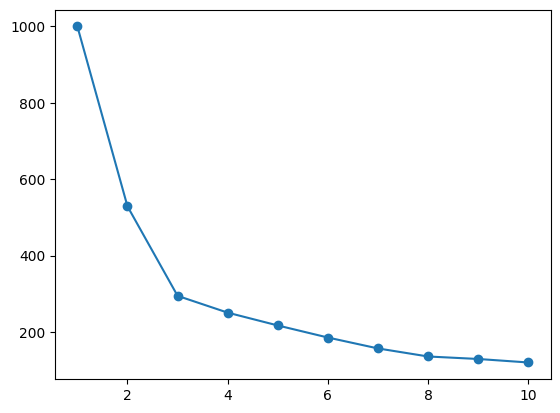

In [9]:
plt.plot(K_range, inertia, marker='o')

In [10]:
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [11]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [12]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

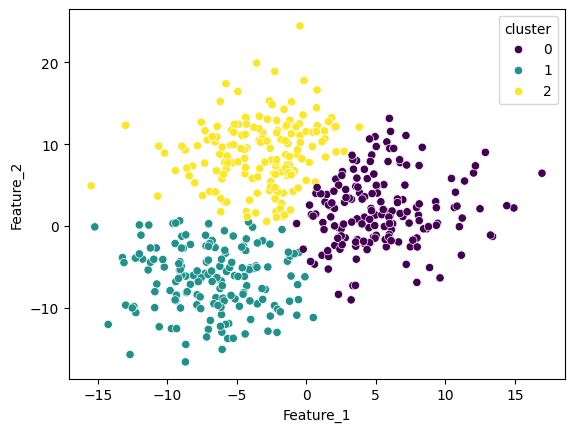

In [13]:

sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')

In [14]:
from sklearn.datasets import make_moons

In [15]:
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [16]:
from sklearn.cluster import KMeans, DBSCAN

In [17]:

df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [18]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
     

In [19]:

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [20]:
df['kmeans_cluster'] = kmeans_labels


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

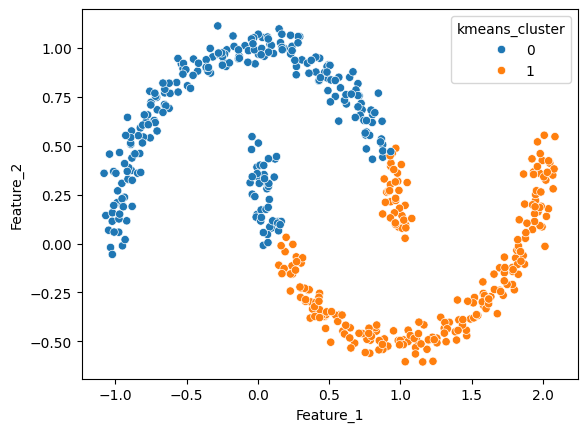

In [21]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['kmeans_cluster'], palette='tab10')

In [22]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [23]:

df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

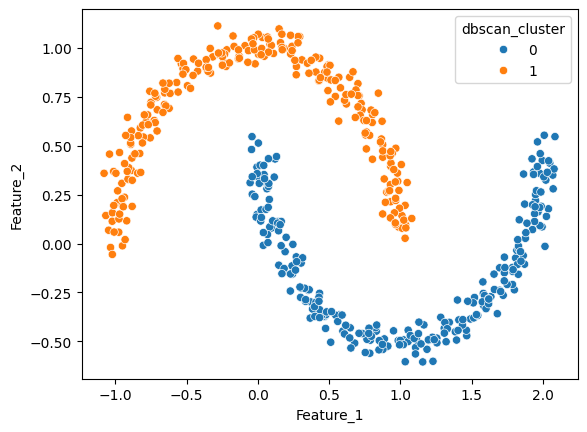

In [24]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'], palette='tab10')